In [1]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:03<00:00, 24.5MB/s]
100% 60.3M/60.3M [00:03<00:00, 17.1MB/s]


In [2]:
!unzip fer2013

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def prepare_data_generators(train_path, val_path, img_size=(48, 48), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1.0/255)

    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale'
    )

    val_gen = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale'
    )

    return train_gen, val_gen

In [5]:
def create_emotion_model(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

In [6]:
def compile_and_train(model, train_gen, val_gen, epochs=30):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        steps_per_epoch=train_gen.samples // train_gen.batch_size,
        validation_steps=val_gen.samples // val_gen.batch_size
    )
    return history

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.2416 - loss: 1.8351 - val_accuracy: 0.2487 - val_loss: 1.7924
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2812 - loss: 1.8206

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.2812 - loss: 1.8206 - val_accuracy: 0.2000 - val_loss: 1.8203
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.2504 - loss: 1.7907 - val_accuracy: 0.2765 - val_loss: 1.7346
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.1875 - loss: 1.7038 - val_accuracy: 0.3000 - val_loss: 1.6046
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.2655 - loss: 1.7731 - val_accuracy: 0.3025 - val_loss: 1.6974
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.3750 - loss: 1.8212 - val_accuracy: 0.1000 - val_loss: 2.0429
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.2785 - loss: 1.7441 - val_accuracy: 0.3411 - val_loss: 1.6425
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.3125 - loss: 1.6888 - val_accuracy: 0.4000 - val_loss: 1.7272
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.2926 - loss: 1.7151 - val_accuracy

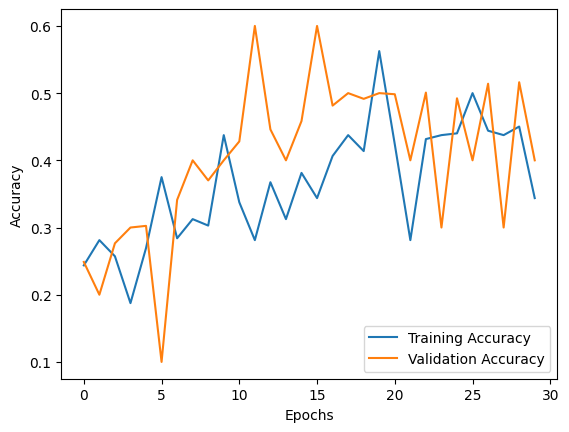

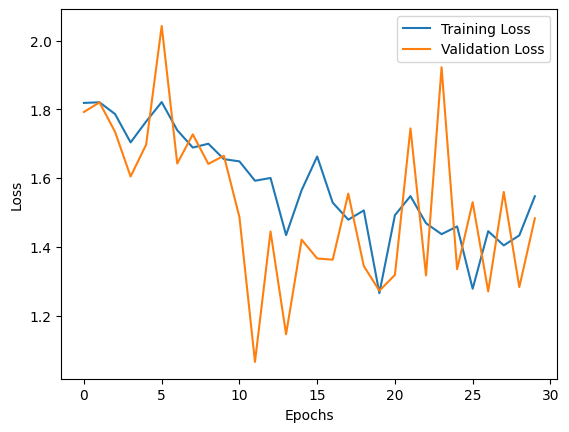

In [7]:
# Example usage:
if __name__ == "__main__":
    train_dir = 'train'
    val_dir = 'test'

    # Prepare data generators
    train_data, val_data = prepare_data_generators(train_dir, val_dir)

    # Build and train the model
    emotion_model = create_emotion_model()
    history = compile_and_train(emotion_model, train_data, val_data)

    # Plot accuracy and loss
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()